In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.colheader_justify", "center")
pd.set_option("display.precision", 3)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

POS_INF_REPLACE = 0.0

def final_score(completness, acc_5, acc_10, acc_20):
    # official score used for final evaluation
    # input values in range [0, 1] not percentage
    return (1 - np.exp(-4 * completness)) * (0.5 * acc_5 + 0.35 * acc_10 + 0.15 * acc_20)


In [2]:
dir_results_parent = Path("experiments")


##################### Auto  Select ###################################
filter_dirs = ["val*", "overwrite_init_cam_distr/*/val*"]
dir_results_candidates = [] 
for filter_dir in filter_dirs:
    dir_results_candidates.extend([f for f in dir_results_parent.glob(filter_dir)])

# dir_results_candidates = [
#     dir_results_parent / "val_full_optimal_extrem_pred", # run 1
#     dir_results_parent / "val_full_optimal_extrem_gt", # run 2
#     dir_results_parent / "val_stacked_gt_optimal_extrem_pred", # run 4
#     dir_results_parent / "val_stacked_pred_optimal_extrem_pred", # run 5
#     dir_results_parent / "overwrite_init_cam_distr/argmin/val_full_optimal_extrem_pred", # run 3

# ]
# filter_dirs = ["val_", "stacked", "argmin"]


print(dir_results_candidates)
dir_plot_results = dir_results_parent / f"plots__{'___'.join([d.replace('*', 'star') for d in filter_dirs])}"
print(dir_plot_results)

# read individual results
dfs = []
for result_dir in dir_results_candidates:
    file_summary = result_dir / "df_summary_full.json"
    if not file_summary.exists():
        print(f"Warning: {file_summary} does not exists... continue")
        continue
    df = pd.read_json(file_summary, orient="records", lines=True)
    df["run"] = result_dir.parent.name + "/" + result_dir.name
    dfs.append(df)

df = pd.concat(dfs)
df.sort_values(["run", "tau", "threshold"], ascending=False, inplace=True)
df.reset_index(inplace=True, drop=True)
df.replace([np.NaN], np.inf, inplace=True)

print(df["run"].unique().tolist())

# df["completeness rate"] = df["completeness rate"].apply(lambda s: float(s.split(" (")[0]))
# df["total completeness rate"] = df["total completeness rate"].apply(lambda s: float(s.split(" (")[0]))
df

[PosixPath('experiments/val_full_optimal_extrem_gt'), PosixPath('experiments/val_center_gt_optimal_extrem_pred'), PosixPath('experiments/val_right_gt_optimal_extrem_pred'), PosixPath('experiments/val_stacked_gt_optimal_extrem_pred'), PosixPath('experiments/val_left_gt_optimal_extrem_pred'), PosixPath('experiments/val_right_pred_optimal_extrem_pred'), PosixPath('experiments/val_center_pred_optimal_extrem_pred'), PosixPath('experiments/val_left_pred_optimal_extrem_pred'), PosixPath('experiments/val_full_optimal_extrem_pred'), PosixPath('experiments/val_stacked_pred_optimal_extrem_pred'), PosixPath('experiments/overwrite_init_cam_distr/center/val_full_optimal_extrem_pred'), PosixPath('experiments/overwrite_init_cam_distr/right/val_full_optimal_extrem_pred'), PosixPath('experiments/overwrite_init_cam_distr/argmin/val_full_optimal_extrem_pred'), PosixPath('experiments/overwrite_init_cam_distr/left/val_full_optimal_extrem_pred')]
experiments/plots__valstar___overwrite_init_cam_distr/star/val

,tau,threshold,completeness (subset),completeness,meanRecall,meanPrecision,meanAccuracies,Side line leftPrecision,Side line leftRecall,Side line leftAccuracy,Small rect. left bottomPrecision,Small rect. left bottomRecall,Small rect. left bottomAccuracy,Goal left crossbarPrecision,Goal left crossbarRecall,Goal left crossbarAccuracy,Goal left post left Precision,Goal left post left Recall,Goal left post left Accuracy,Small rect. right mainPrecision,Small rect. right mainRecall,Small rect. right mainAccuracy,Goal right crossbarPrecision,Goal right crossbarRecall,Goal right crossbarAccuracy,Small rect. right topPrecision,Small rect. right topRecall,Small rect. right topAccuracy,Side line rightPrecision,Side line rightRecall,Side line rightAccuracy,Goal right post leftPrecision,Goal right post leftRecall,Goal right post leftAccuracy,Circle centralPrecision,Circle centralRecall,Circle centralAccuracy,Middle linePrecision,Middle lineRecall,Middle lineAccuracy,Small rect. left topPrecision,Small rect. left topRecall,Small rect. left topAccuracy,Big rect. left topPrecision,Big rect. left topRecall,Big rect. left topAccuracy,Circle leftPrecision,Circle leftRecall,Circle leftAccuracy,Big rect. left bottomPrecision,Big rect. left bottomRecall,Big rect. left bottomAccuracy,Side line topPrecision,Side line topRecall,Side line topAccuracy,Big rect. left mainPrecision,Big rect. left mainRecall,Big rect. left mainAccuracy,Small rect. left mainPrecision,Small rect. left mainRecall,Small rect. left mainAccuracy,Big rect. right bottomPrecision,Big rect. right bottomRecall,Big rect. right bottomAccuracy,Small rect. right bottomPrecision,Small rect. right bottomRecall,Small rect. right bottomAccuracy,Circle rightPrecision,Circle rightRecall,Circle rightAccuracy,Side line bottomPrecision,Side line bottomRecall,Side line bottomAccuracy,Big rect. right mainPrecision,Big rect. right mainRecall,Big rect. right mainAccuracy,Big rect. right topPrecision,Big rect. right topRecall,Big rect. right topAccuracy,Goal left post rightPrecision,Goal left post rightRecall,Goal left post rightAccuracy,Goal right post rightPrecision,Goal right post rightRecall,Goal right post rightAccuracy,Line unknownPrecision,Line unknownRecall,Line unknownAccuracy,run
0,0.025,20,0.9433962264150944 (1900/2014),0.680,0.993,0.924,0.919,0.929,1.000,0.929,0.981,0.992,0.973,0.980,0.982,0.963,0.987,0.982,0.969,0.967,0.993,0.961,0.969,0.989,0.958,0.970,0.994,0.965,0.912,0.996,0.909,0.971,0.999,0.969,0.933,0.996,0.929,0.868,1.0,0.868,0.969,0.997,0.966,0.930,0.997,0.927,0.973,0.994,0.967,0.919,0.989,0.910,0.932,1.000,0.932,0.928,0.993,0.922,0.969,0.992,0.961,0.918,0.993,0.912,0.970,0.994,0.964,0.978,0.996,0.974,0.843,0.960,0.815,0.925,0.988,0.915,0.936,0.995,0.932,0.981,0.990,0.972,0.966,0.991,0.958,inf,inf,inf,experiments/val_stacked_pred_optimal_extrem_pred
1,0.025,10,0.9433962264150944 (1900/2014),0.680,0.992,0.801,0.797,0.803,1.000,0.803,0.946,0.992,0.939,0.966,0.982,0.949,0.977,0.982,0.960,0.934,0.993,0.928,0.942,0.988,0.932,0.937,0.994,0.932,0.788,0.995,0.785,0.957,0.999,0.955,0.883,0.996,0.879,0.790,1.0,0.790,0.944,0.997,0.941,0.822,0.997,0.820,0.957,0.994,0.952,0.841,0.988,0.833,0.909,1.000,0.909,0.765,0.992,0.760,0.937,0.991,0.929,0.845,0.992,0.839,0.932,0.994,0.926,0.967,0.996,0.963,0.772,0.956,0.745,0.729,0.985,0.721,0.845,0.994,0.841,0.970,0.990,0.961,0.932,0.991,0.924,inf,inf,inf,experiments/val_stacked_pred_optimal_extrem_pred
2,0.025,5,0.9433962264150944 (1900/2014),0.680,0.982,0.545,0.542,0.644,0.990,0.640,0.850,0.986,0.840,0.802,0.975,0.786,0.866,0.975,0.847,0.795,0.983,0.785,0.756,0.979,0.744,0.826,0.990,0.820,0.649,0.985,0.643,0.819,0.995,0.816,0.742,0.995,0.739,0.551,1.0,0.551,0.831,0.993,0.826,0.710,0.991,0.705,0.861,0.990,0.854,0.684,0.973,0.672,0.747,0.998,0.746,0.525,0.977,0.519,0.798,0.983,0.787,0.692,0.980,0.682,0.812,0.984,0.801,0.907,0.990,0.899,0.604,0.913,0.571,0.490,0.970,0.483,0.703,0.989,0.698,0.765,0.987,0.757,0.724,0.980,0.713,inf,inf,inf,experiments/val_s

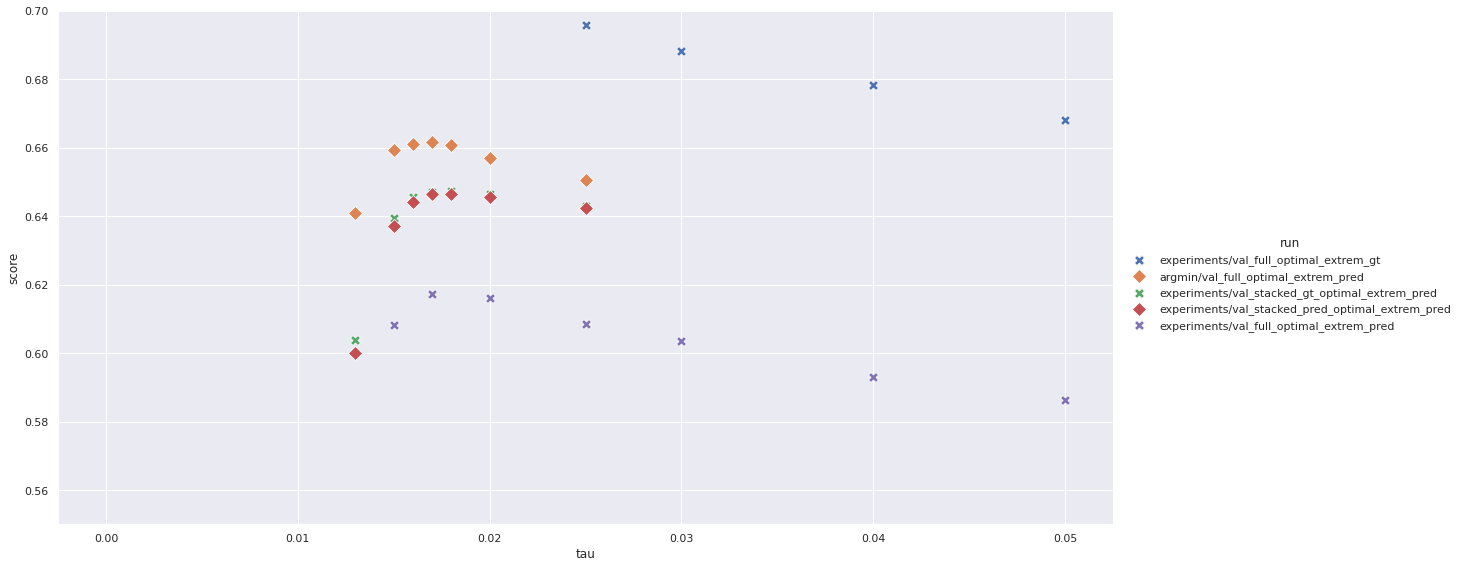

In [3]:
eval_completness_rate = "completeness" # "total completeness rate"
acc_mean = "meanAccuracies" # "accuracy mean"

df_summary_wide = df[["run", "tau", "threshold", eval_completness_rate, acc_mean]].pivot(
    index=["tau", "run", eval_completness_rate], columns="threshold"
)
df_summary_wide.columns = ['@'.join([str(x) for x in col]) for col in df_summary_wide.columns]
df_summary_wide.reset_index(drop=False, inplace=True)
df_summary_wide = df_summary_wide.replace([np.inf, float("inf")], POS_INF_REPLACE)
df_summary_wide["annotation"] = df_summary_wide["run"].apply(lambda s: "ground truth" if "extrem_gt" in s else "predicted")


# df_summary_wide["run"] = df_summary_wide["run"].apply(lambda run: run_rename[run])


df_summary_wide["score"] = final_score(df_summary_wide[eval_completness_rate], df_summary_wide[f"{acc_mean}@5"], df_summary_wide[f"{acc_mean}@10"], df_summary_wide[f"{acc_mean}@20"])

markers = ["D" if "gt" in s else "X" for s in df_summary_wide["run"].unique()]
df_summary_wide.sort_values("score", ascending=False, inplace=True)


g = sns.FacetGrid(df_summary_wide, hue="run", height=8.0, sharey=True, aspect=2, hue_kws={"marker": markers}, legend_out=True) #  col="annotation"
g.map(sns.scatterplot, "tau", "score", legend="auto", s=100)# .set(xticks=df_summary_wide.tau.unique())
g.add_legend(markerscale=1.0) # , loc="upper left", frameon=False)
dir_plot_results.mkdir(exist_ok=True, parents=True)
plt.ylim([0.55, 0.7])
g.savefig(dir_plot_results / "tau_vs_eval_score.svg")
g.savefig(dir_plot_results / "tau_vs_eval_score.pdf")

In [4]:
df_summary_wide.groupby("run").apply(pd.DataFrame.head, n=2)

tau                         run                         completeness  meanAccuracies@5  meanAccuracies@10  meanAccuracies@20   annotation   score
run                                                                                                                                                                                                    
argmin/val_full_optimal_extrem_pred              11  0.017               argmin/val_full_optimal_extrem_pred      0.672           0.571             0.819              0.921           predicted  0.662
                                                 8   0.016               argmin/val_full_optimal_extrem_pred      0.652           0.575             0.823              0.924           predicted  0.661
experiments/val_full_optimal_extrem_gt           12  0.017            experiments/val_full_optimal_extrem_gt      0.615           0.661             0.858              0.950        ground truth  0.708
                                                 4   0.015            experiments/val_full_optimal_extrem_gt      0.586           0.672             0.865              0.954        ground truth  0.707
experiments/val_full_optimal_extrem_pred         13  0.017          experiments/val_full_optimal_extrem_pred      0.589           0.536             0.791              0.915           predicted  0.617
                                                 21  0.020          experiments/val_full_optimal_extrem_pred      0.648           0.518             0.774              0.905           predicted  0.616
experiments/val_stacked_gt_optimal_extrem_pred   17  0.018    experiments/val_stacked_gt_optimal_extrem_pred      0.642           0.557             0.810              0.926           predicted  0.647
                                                 14  0.017    experiments/val_stacked_gt_optimal_extrem_pred      0.627           0.562             0.813              0.928           predicted  0.647
experiments/val_stacked_pred_optimal_extrem_pred 18  0.018  experiments/val_stacked_pred_optimal_extrem_pred      0.641           0.557             0.810              0.926           predicted  0.647
                                                 15  0.017  experiments/val_stacked_pred_optimal_extrem_pred      0.621           0.562             0.814              0.928           predicted  0.646

In [5]:
df_summary_wide

,tau,run,completeness,meanAccuracies@5,meanAccuracies@10,meanAccuracies@20,annotation,score
12,0.017,experiments/val_full_optimal_extrem_gt,0.615,0.661,0.858,0.950,ground truth,0.708
4,0.015,experiments/val_full_optimal_extrem_gt,0.586,0.672,0.865,0.954,ground truth,0.707
20,0.020,experiments/val_full_optimal_extrem_gt,0.643,0.648,0.848,0.944,ground truth,0.704
25,0.025,experiments/val_full_optimal_extrem_gt,0.675,0.630,0.832,0.931,ground truth,0.696
29,0.030,experiments/val_full_optimal_extrem_gt,0.697,0.617,0.819,0.921,ground truth,0.688
...,...,...,...,...,...,...,...,...
2,0.013,experiments/val_stacked_pred_optimal_extrem_pred,0.433,0.591,0.836,0.940,predicted,0.600
32,0.040,experiments/val_full_optimal_extrem_pred,0.714,0.484,0.733,0.872,predicted,0.593
34,0.050,experiments/val_full_optimal_extrem_pred,0.728,0.476,0.723,0.862,predicted,0.586
35,0.000,experiments/val_full_optimal_extrem_gt,0.996,0.448,0.605,0.694,ground truth,0.530


['experiments/val_stacked_pred_optimal_extrem_pred'
 'experiments/val_stacked_gt_optimal_extrem_pred'
 'experiments/val_full_optimal_extrem_pred'
 'experiments/val_full_optimal_extrem_gt'
 'argmin/val_full_optimal_extrem_pred']
['X', 'X', 'X', 'D', 'X']





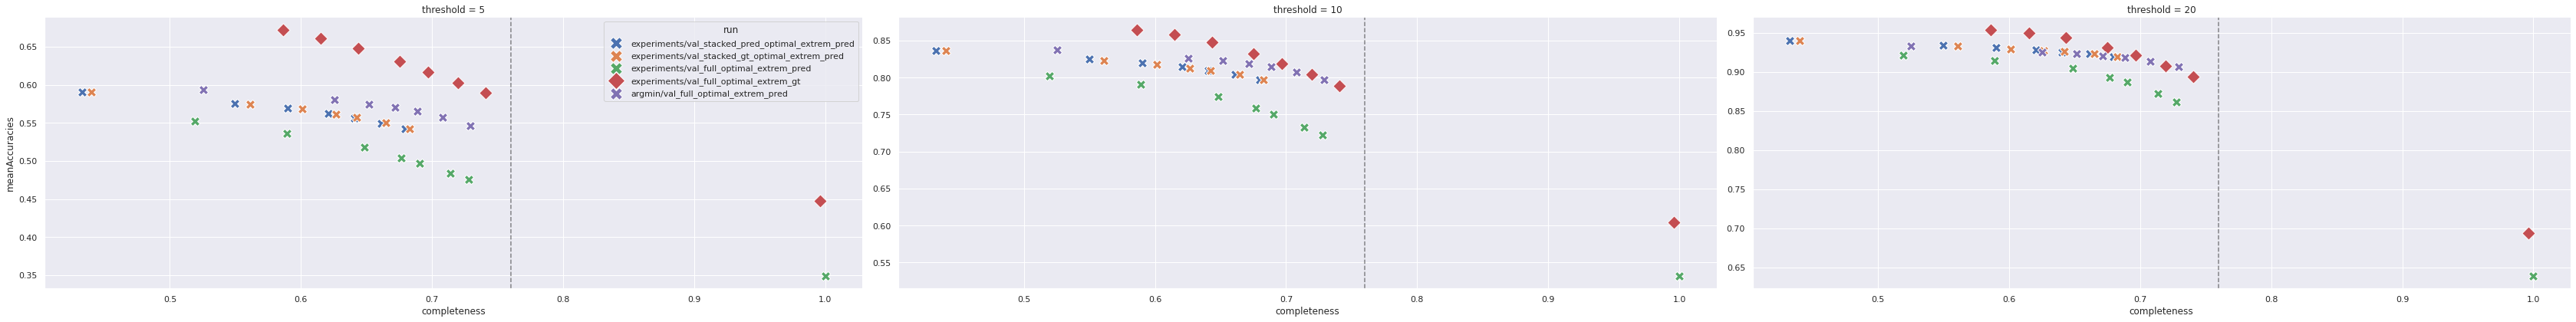

In [6]:

_markers = {"gt": "D", "non-gt": "X"}
print(df["run"].unique())
markers = [_markers["gt"] if ("extrem_gt" in s) else _markers["non-gt"] for s in df["run"].unique()]
print(markers)


# df["run"] = df["run"].apply(lambda run: run_rename[run])

g = sns.FacetGrid(df, col="threshold", hue="run", height=6.0, sharey=False, legend_out=False, aspect=2.6, hue_kws={"marker": markers}) # .set(xlim=[0.5, 1.01])
g.map(sns.scatterplot, eval_completness_rate, acc_mean, s=150)
g.add_legend(markerscale=1.3)

for ax in g.axes.flat:
    print()
    ax.axvline(x=0.76, color="k", **{"alpha": 0.5, "linestyle": "--"}) # max expected completeness for main camera (center, left, right)
g.savefig(dir_plot_results / "tau_acc5-10-20_vs_completeness.svg")
g.savefig(dir_plot_results / "tau_acc5-10-20_vs_completeness.pdf")
